In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
salary=pd.read_csv("Salary_Data.csv")
salary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
delivery=pd.read_csv("delivery_time.csv")
delivery.head(10)

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\assim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

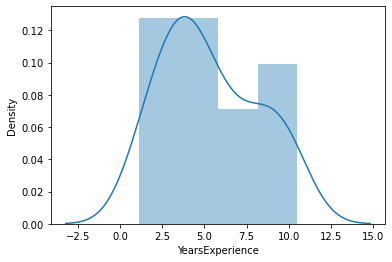

In [6]:
sns.distplot(salary['YearsExperience'])

C:\Users\assim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

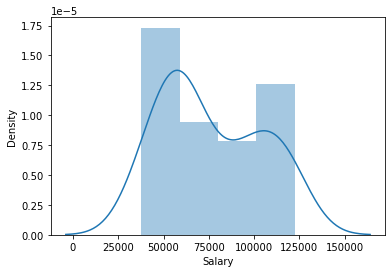

In [7]:
sns.distplot(salary['Salary'])

In [9]:
salary_data=smf.ols("Salary~YearsExperience",data=salary).fit()

In [10]:
salary_data.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

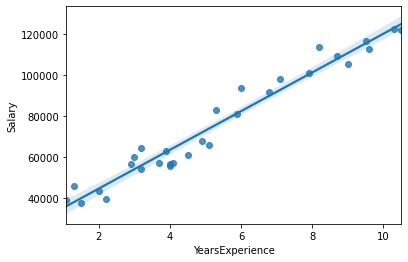

In [11]:
sns.regplot(x='YearsExperience',y='Salary',data=salary)

In [12]:
print(salary_data.tvalues,"\n",salary_data.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [13]:
(salary_data.rsquared,salary_data.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [14]:
salary_hike=pd.DataFrame(pd.Series([5,3]),columns=['YearsExperience'])

In [15]:
salary_hike

,YearsExperience
0,5
1,3


In [16]:
salary_data.predict(salary_hike)

0    73042.011806
1    54142.087163
dtype: float64

In [17]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [18]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\assim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

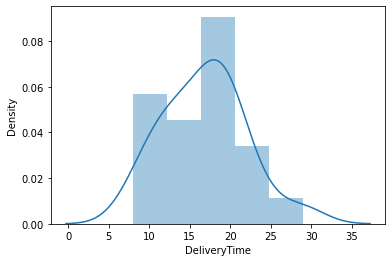

In [47]:
sns.distplot(delivery.DeliveryTime)

C:\Users\assim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

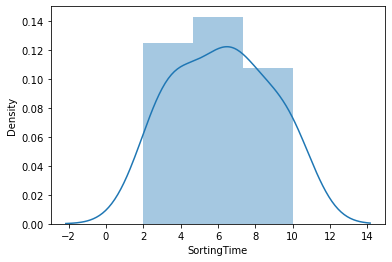

In [49]:
sns.distplot(delivery.SortingTime)

In [51]:
delivery_do=smf.ols("DeliveryTime~SortingTime",data=delivery).fit()

In [54]:
delivery_do.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                        13:11:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
delivery_do.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [59]:
print(delivery_do.tvalues,'\n',delivery_do.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [60]:
delivery_do.rsquared,delivery_do.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

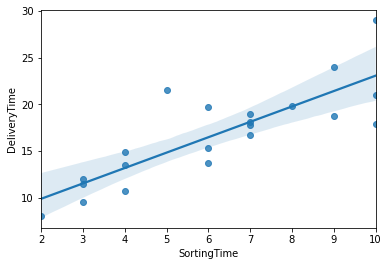

In [62]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=delivery)

In [66]:
delivery_predict=pd.DataFrame(pd.Series([3,1.5]),columns=['SortingTime'])
delivery_predict

,SortingTime
0,3.0
1,1.5


In [67]:
delivery_do.predict(delivery_predict)

0    11.529794
1     9.056264
dtype: float64